In [1]:
import pandas as pd
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import numpy as np

In [2]:
# 그래프에서 한글을 표기하기 위해 글꼴 변경 
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [4]:
winsor_df = pd.read_csv('../data/final_data_after_winsorization.csv', index_col=0)
winsor_df.fillna(0, inplace=True)
winsor_df.head(2)

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,총_20_30대_(수),총_40_50대_(수),총_60대이상_(수),총_10대,총_20_30대,총_40_50대,총_60대이상,유치원_초등학교_(수),유치원_초등학교,거주_유동_인구당_매출액
행정동명,,,,,,,,,,,,,,,,,,,,,
가락1동,9836,1633,2492,2706,2438,449,118,10.0,0.0,1.0,...,15010,17080,11642,0.095664,0.272572,0.310162,0.211411,3.0,0.000054,26.850496
가락2동,12375,3568,2746,2825,2641,453,142,3.0,0.0,4.0,...,17364,20426,14158,0.104766,0.277141,0.326013,0.225971,6.0,0.000096,35.834189


In [5]:
winsor_df['1인세대'] = winsor_df['2023년09월_1인세대'] / winsor_df['2023년09월_전체세대']
winsor_df['2인세대'] = winsor_df['2023년09월_2인세대'] / winsor_df['2023년09월_전체세대']
winsor_df['3인세대'] = winsor_df['2023년09월_3인세대'] / winsor_df['2023년09월_전체세대']
winsor_df['4인세대'] = winsor_df['2023년09월_4인세대'] / winsor_df['2023년09월_전체세대']
winsor_df['5인세대'] = winsor_df['2023년09월_5인세대'] / winsor_df['2023년09월_전체세대']
winsor_df['6인세대이상'] = winsor_df['2023년9월_6인가구이상'] / winsor_df['2023년09월_전체세대']

In [10]:
df=winsor_df[['1인세대', '2인세대', '3인세대', '4인세대', '5인세대', '6인세대이상']]

In [11]:
mean=[((df['1인세대'].mean())*100).round(2), ((df['2인세대'].mean())*100).round(2), ((df['3인세대'].mean())*100).round(2), ((df['4인세대'].mean())*100).round(2), ((df['5인세대'].mean())*100).round(2), ((df['6인세대이상'].mean())*100).round(2)]

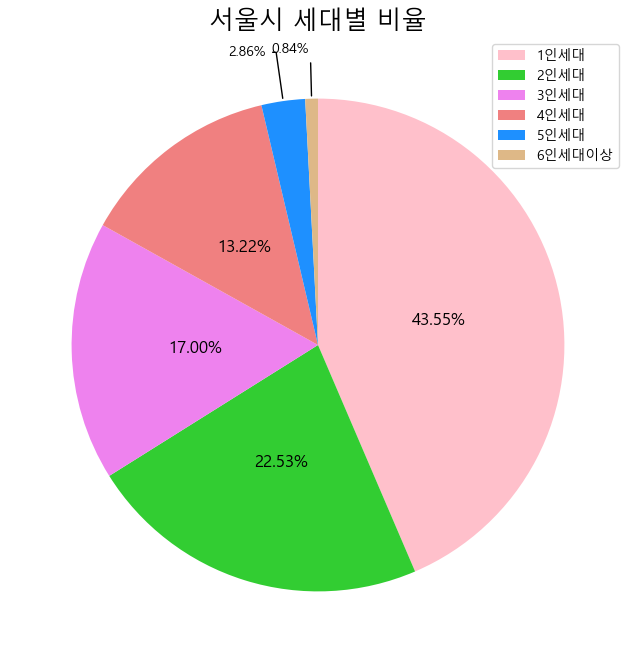

In [12]:
## 데이터 준비
colors = ['pink','limegreen','violet','lightcoral', 'dodgerblue', 'burlywood'] ## 색상
labels = ['1인세대', '2인세대', '3인세대', '4인세대', '5인세대', '6인세대이상'] ## 라벨
frequency = mean ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)
    
plt.legend(pie[0],labels,loc='upper right') ## 범례
plt.title('서울시 세대별 비율', fontsize=18) ##제목
plt.show()